<a href="https://colab.research.google.com/github/tanyaclement/IntroDH/blob/master/text_analysis/Sentiment_Analysis_in_Python_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis in Python this is by Tanya

In this notebook we will be doing some sentiment analysis in python using VADER (Valence Aware Dictionary and sEntiment Reasoner)

## Notebook Helpful Hints
1. You can run a piece of code by hitting the 'play' button in the code block.
2. Run all the pieces of code you come across. Later blocks of code often depend on previous ones.
3. If you need help, ask! It's what we're here for.

# 1. Setup and Initialization

In [ ]:
!pip install vaderSentiment  # Install the VADER sentiment analysis library

# Import SentimentIntensityAnalyzer class for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Libraries for plotting and visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # Set the plotting style to 'ggplot'

# Natural Language Processing libraries from nltk
import nltk
from nltk.tokenize import word_tokenize  # Function for tokenizing text into words
from nltk.corpus import stopwords  # Collection of common stop words in various languages

# Download necessary nltk datasets for language processing tasks
nltk.download('vader_lexicon')  # Lexicon for sentiment analysis
nltk.download('punkt')  # Model for tokenizing sentences
nltk.download('stopwords')  # Collection of stop words
nltk.download('averaged_perceptron_tagger')  # Pre-trained tagger for part-of-speech tagging

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.2 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# 2. Fun with NLTK and VADER!

## NLTK - Natural Language Toolkit
The NLTK packages can do all sorts of natural language processing, including splitting your text into 'tokens' and even determining parts of speech!

## Tokenization and POS Tagging

First, let's create an array of sentences to work with. The following makes an array with lines from Anakin Skywalker/Darth Vader over the course of the *Star Wars* movies.

In [ ]:
# Initialize an array of quotations

darthVaderArray = ["I Have Brought Peace, Freedom, Justice, and Security to My New Empire.",
                   "I Am Altering the Deal. Pray, I Don’t Alter It Any Further.",
                   "From my point of view, the Jedi are evil!",
                   "No, I am your father."]

print(darthVaderArray)

['I Have Brought Peace, Freedom, Justice, and Security to My New Empire.', 'I Am Altering the Deal. Pray, I Don’t Alter It Any Further.', 'From my point of view, the Jedi are evil!', 'No, I am your father.']


Let's break those quotes down into tokens. Do you notice anything with the puncutation?

In [ ]:
# Tokenize and print each quotation

for quote in darthVaderArray:
  tokens = nltk.word_tokenize(quote)
  print(tokens)

['I', 'Have', 'Brought', 'Peace', ',', 'Freedom', ',', 'Justice', ',', 'and', 'Security', 'to', 'My', 'New', 'Empire', '.']
['I', 'Am', 'Altering', 'the', 'Deal', '.', 'Pray', ',', 'I', 'Don', '’', 't', 'Alter', 'It', 'Any', 'Further', '.']
['From', 'my', 'point', 'of', 'view', ',', 'the', 'Jedi', 'are', 'evil', '!']
['No', ',', 'I', 'am', 'your', 'father', '.']


Let's focus on the first quotation:

In [ ]:
# tokenize and print the quotation

tokens = nltk.word_tokenize(darthVaderArray[0])
print(tokens)

['I', 'Have', 'Brought', 'Peace', ',', 'Freedom', ',', 'Justice', ',', 'and', 'Security', 'to', 'My', 'New', 'Empire', '.']


Then, we'll have the NLTK tag each token with a part of speech. Interested in looking up the tags? Cool! Check [here](https://www.ibm.com/docs/en/wca/3.5.0?topic=analytics-part-speech-tag-sets) for tag descriptions.

In [ ]:
# Then, we'll have NLTK tag each part of speech (POS)

tagged = nltk.pos_tag(tokens)

for taggedData in tagged:
  print (taggedData)

('I', 'PRP')
('Have', 'VBP')
('Brought', 'VBN')
('Peace', 'NNP')
(',', ',')
('Freedom', 'NNP')
(',', ',')
('Justice', 'NNP')
(',', ',')
('and', 'CC')
('Security', 'NNP')
('to', 'TO')
('My', 'NNP')
('New', 'NNP')
('Empire', 'NNP')
('.', '.')


The NLTK can do a lot more, but these are some basics that our tool, VADER, is using in the background.

# VADER Sentiment
## b. Generating Sentiment Scores

Generating sentiment scores with VADER is pretty easy. Below, we'll learn how to get scores for our *Star Wars* quotes.

In [ ]:
# Set up the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Generate sentiment scores for the sample quotations
for quote in darthVaderArray:
  vs = vader.polarity_scores(quote) # this line generates the score
  print("{:-<70} {}".format(quote, str(vs)))

I Have Brought Peace, Freedom, Justice, and Security to My New Empire. {'neg': 0.0, 'neu': 0.372, 'pos': 0.628, 'compound': 0.926}
I Am Altering the Deal. Pray, I Don’t Alter It Any Further.----------- {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.3182}
From my point of view, the Jedi are evil!----------------------------- {'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compound': -0.69}
No, I am your father.------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


Notice the sets of three scores at the end. Do you see anything expected or unexpected?

## Try It Yourself!

Find quotations from your own favorite books or movies! Try to think of a variety of samples with complexities like sarcasm or irony. Negation or quotations requiring extra context might be interesting as well!

In [ ]:
# Initialize your own array of quotations. Feel free to use more than three.

quotationsArray = ["add",
                   "quotes",
                   "here"]

print (quotationsArray)

['add', 'quotes', 'here']


In [ ]:
# Generate sentiment scores for the sample quotations

for quote in quotationsArray:
    vs = vader.polarity_scores(quote)
    print("{:-<65} {}".format(quote, str(vs)))

add-------------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
quotes----------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
here------------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


What did you find? Was anything unexpected?

# 3. Analyzing Star Wars!

## Import and load the script data

This section loads the script data and takes a look at dialogue and character!

In [ ]:
from urllib.request import urlretrieve

# retrieve the files from GitHub
urlIV = "https://raw.githubusercontent.com/emily565/sentimentworkshop/main/SW_EpisodeIV.txt"
urlV = "https://raw.githubusercontent.com/emily565/sentimentworkshop/main/SW_EpisodeV.txt"
urlVI = "https://raw.githubusercontent.com/emily565/sentimentworkshop/main/SW_EpisodeVI.txt"

# load the scripts
scriptIV = pd.read_csv(urlIV, sep=' ', on_bad_lines='skip')
scriptV = pd.read_csv(urlV, sep=' ', on_bad_lines='skip')
scriptVI = pd.read_csv(urlVI, sep=' ', on_bad_lines='skip')

# Convert to CSV
scriptIV.to_csv('episodeIV.csv', index=False)
scriptV.to_csv('episodeV.csv', index=False)
scriptVI.to_csv('episodeVI.csv', index=False)

# Merge scripts into an Original Trilogy set
frames = [scriptIV, scriptV, scriptVI]
SW_Trilogy = pd.concat(frames)
Trio = SW_Trilogy.reset_index(drop=True)


# How many lines of dialogue were found?
print('Lines of Dialogue in Star Wars Trilogy:', len(Trio), '\n')


Lines of Dialogue in Star Wars Trilogy: 2519 



Let's look at the data we imported:

In [ ]:
print(Trio.head(20))

           character                                           dialogue
0           THREEPIO  Did you hear that?  They've shut down the main...
1           THREEPIO                                      We're doomed!
2           THREEPIO  There'll be no escape for the Princess this time.
3           THREEPIO                                       What's that?
4           THREEPIO  I should have known better than to trust the l...
5               LUKE  Hurry up!  Come with me!  What are you waiting...
6           THREEPIO                 Artoo! Artoo-Detoo, where are you?
7           THREEPIO                     At last!  Where have you been?
8           THREEPIO  They're heading in this direction. What are we...
9           THREEPIO                Wait a minute, where are you going?
10  IMPERIAL OFFICER  The Death Star plans are not in the main compu...
11             VADER     Where are those transmissions you intercepted?
12     REBEL OFFICER  We intercepted no transmissions. Aaah...  

Notice anything about the processing?

Let's break the lines down by character:

In [ ]:
# How many lines belonged to the top 20 characters?
print('Total Lines of top 20 characters in Star Wars Trilogy:\n')

print(Trio.character.value_counts().head(20))

Total Lines of top 20 characters in Star Wars Trilogy:

character
LUKE           494
HAN            458
THREEPIO       299
LEIA           226
VADER          140
BEN            115
LANDO          101
YODA            49
EMPEROR         44
RED LEADER      38
BIGGS           34
WEDGE           33
PIETT           31
TARKIN          28
JABBA           26
OWEN            25
CREATURE        22
TROOPER         19
GOLD LEADER     14
ACKBAR          14
Name: count, dtype: int64


We can also break down dialogue by each script. Episode IV is aleady done, can you print out Episodes V and VI?

In [ ]:
Top20Chars_epiv = scriptIV.character.value_counts().head(20)
Top20Chars_epv = scriptV.character.value_counts().head(20)
Top20Chars_epvi = scriptVI.character.value_counts().head(20)

# Here's Episode IV
print("Top 20 characters in Episode IV")
print(Top20Chars_epiv)

# What about Episodes V and VI?

Top 20 characters in Episode IV
character
LUKE                         254
HAN                          153
THREEPIO                     118
BEN                           82
LEIA                          57
VADER                         41
RED LEADER                    37
BIGGS                         34
TARKIN                        28
OWEN                          25
TROOPER                       19
GOLD LEADER                   14
WEDGE                         14
OFFICER                       11
RED TEN                        8
GOLD FIVE                      7
DODONNA                        6
INTERCOM VOICE                 6
GREEDO                         6
DEATH STAR INTERCOM VOICE      6
Name: count, dtype: int64


## Analysis by Character
Now that we can break down the scripts by character, we can do an analysis of an individual character. Let's start with Luke Skywalker.

In [ ]:
# pick out all of Luke's lines from our set of all three scripts
lukeRows = Trio[Trio['character'] == 'LUKE'].copy()

# Initialize an empty list to store sentiment scores
sentiment_scores = []

# Initialize the analysizer
vader = SentimentIntensityAnalyzer()

# Iterate over each line of dialogue to collect the compound score
for text in lukeRows['dialogue']:
    score = vader.polarity_scores(text)['compound']  # Get compound score for each text
    sentiment_scores.append(score)

# Add sentiment scores to the lines as a new column
lukeRows.loc[:, 'sentiment_score'] = sentiment_scores

# print out twenty of Luke's lines
print(lukeRows.head(20))


   character                                           dialogue  \
5       LUKE  Hurry up!  Come with me!  What are you waiting...   
28      LUKE                   Shape it up you guys!...  Biggs?   
29      LUKE  I didn't know you were back!  When did you get...   
31      LUKE  The Academy didn't change you much... but you'...   
33      LUKE  I almost forgot.  There's a battle going on!  ...   
35      LUKE                                    There they are!   
37      LUKE           But there was a lot of firing earlier...   
38      LUKE                            Hey, easy with those...   
65      LUKE  ... so I cut off my power, shut down the after...   
67      LUKE  Look who's talking.  Now that you've been arou...   
69      LUKE  Well, things haven't been the same since you l...   
71      LUKE                        What are you talking about?   
73      LUKE       Join the Rebellion?!  Are you kidding!  How?   
75      LUKE  I'm sorry.  I'm quiet. Listen how quiet I am. ..

These are Luke's first 20 lines in the Star Wars franchise. Did you expect positivity? Negativity? Neutrality? Why?

## Plotting Luke

We can also plot Luke's sentiment over the course of all three films using his lines.

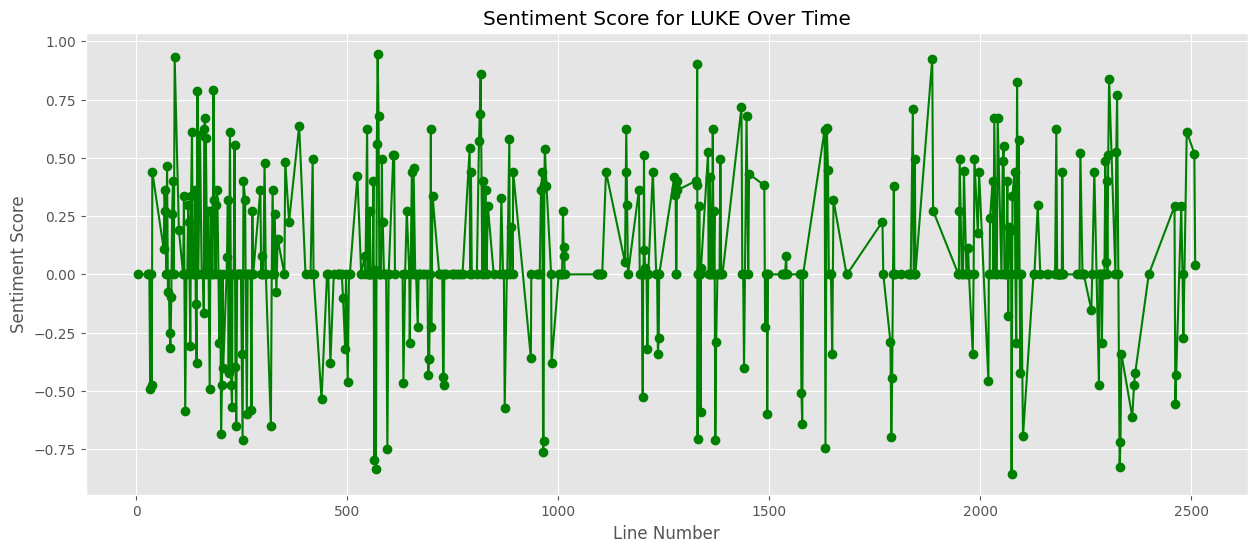

In [ ]:
# Draw a plot for Luke's sentiment score over time

plt.figure(figsize=(15,6))
plt.plot(lukeRows.index, lukeRows['sentiment_score'], marker='o', linestyle='-', color="green")
plt.title('Sentiment Score for LUKE Over Time')
plt.xlabel('Line Number')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

What do you see here? Can you tell where one film ends and another begins? What happens to Luke's sentiment over time? What happens to Luke's number of lines over time?

## Try it yourself!
Use the 'Top 20' characters chart to select your own characters to analyze! Using Luke as an example, analyze and plot your character's sentiment over the course of all three films.

In [ ]:
# pick out all of your character's lines from our set of all three scripts
characterRows = Trio[Trio['character'] == 'VADER'].copy()

# Initialize an empty list to store sentiment scores
sentiment_scores = []

# Initialize the analysizer
vader = SentimentIntensityAnalyzer()

# Iterate over each line of dialogue to collect the compound score
for text in characterRows['dialogue']:
    score = vader.polarity_scores(text)['compound']  # Get compound score for each text
    sentiment_scores.append(score)

# Add sentiment scores to the lines as a new column
characterRows.loc[:, 'sentiment_score'] = sentiment_scores

# print out twenty of your character's lines
print(characterRows.head(20))

### Plotting

Plot your character's lines over the films

In [ ]:
# Draw a plot for Luke's sentiment score over time

plt.figure(figsize=(15,6))
plt.plot(characterRows.index, characterRows['sentiment_score'], marker='o', linestyle='-', color="orange")
plt.title('Sentiment Score for VADER Over Time')
plt.xlabel('Line Number')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

### Comparisons
How is your character's journey different from Luke's? Let's see!

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(lukeRows.index, lukeRows['sentiment_score'], marker='o', linestyle='-', label = "Luke", color="red")
plt.plot(characterRows.index, characterRows['sentiment_score'], marker='o', linestyle="dashed", color="blue", label = "Your Character")
plt.title('Sentiment Score for Luke and Vader Over Time')
plt.xlabel('Line Number')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

What kind of comparisons can you draw between you two characters? How do their sentimental journeys differ?

Feel free to try more characters if you have extra time!